In [1]:
# # Download the validation set
# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-06-15 18:47:14--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10,95M  2,64MB/s    in 4,6s    

2022-06-15 18:47:20 (2,39 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import zipfile

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [4]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse04-3.png', 'horse35-3.png', 'horse46-6.png', 'horse01-9.png', 'horse11-6.png', 'horse41-6.png', 'horse43-5.png', 'horse37-5.png', 'horse25-0.png', 'horse16-2.png']
TRAIN SET HUMANS: ['human10-13.png', 'human08-12.png', 'human05-05.png', 'human15-26.png', 'human02-22.png', 'human08-30.png', 'human11-30.png', 'human16-01.png', 'human08-24.png', 'human01-25.png']
VAL SET HORSES: ['horse1-224.png', 'horse1-484.png', 'horse4-556.png', 'horse3-484.png', 'horse2-201.png', 'horse4-501.png', 'horse4-389.png', 'horse2-294.png', 'horse5-076.png', 'horse4-541.png']
VAL SET HUMANS: ['valhuman02-02.png', 'valhuman03-17.png', 'valhuman01-12.png', 'valhuman04-24.png', 'valhuman04-20.png', 'valhuman01-23.png', 'valhuman03-02.png', 'valhuman05-09.png', 'valhuman04-14.png', 'valhuman04-16.png']


In [6]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

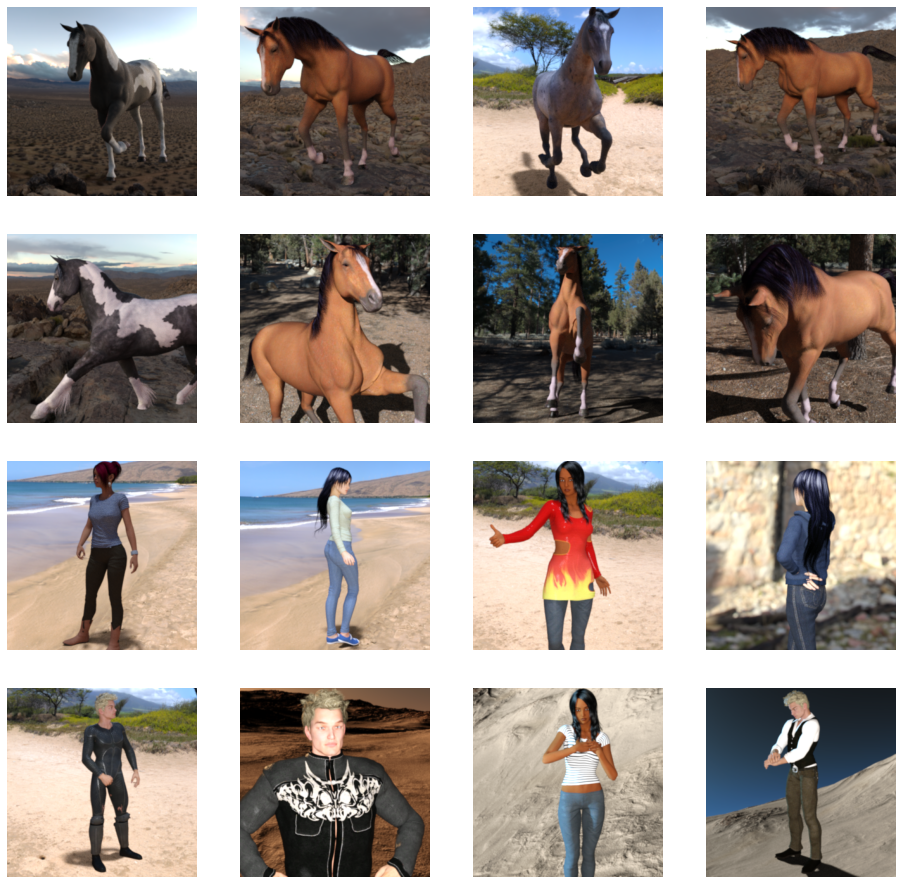

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-06-15 18:50:46.248436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-15 18:50:46.248478: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-15 18:50:49.441620: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-15 18:50:49.441664: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-15 18:50:49.441696: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fadilrisdian-X455LAB): /proc/driver/nvidia/version does not exist
2022-06-15 18:50:49.441995: I tensorflow/core/platform/c

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15


2022-06-15 18:51:13.532059: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 727482368 exceeds 10% of free system memory.
2022-06-15 18:51:15.473526: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 354041856 exceeds 10% of free system memory.
2022-06-15 18:51:19.058444: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 354041856 exceeds 10% of free system memory.
2022-06-15 18:51:21.808398: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 363741184 exceeds 10% of free system memory.
2022-06-15 18:51:21.808516: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 727482368 exceeds 10% of free system memory.


8/8 [==============================] - 81s 10s/step - loss: 0.8319 - accuracy: 0.5017 - val_loss: 0.6753 - val_accuracy: 0.5898
Epoch 2/15
8/8 [==============================] - 79s 10s/step - loss: 0.6585 - accuracy: 0.6263 - val_loss: 0.6437 - val_accuracy: 0.5391
Epoch 3/15
8/8 [==============================] - 78s 10s/step - loss: 0.6186 - accuracy: 0.6630 - val_loss: 0.4057 - val_accuracy: 0.8320
Epoch 4/15
8/8 [==============================] - 78s 10s/step - loss: 0.4877 - accuracy: 0.7631 - val_loss: 2.9050 - val_accuracy: 0.5039
Epoch 5/15
8/8 [==============================] - 76s 9s/step - loss: 0.5352 - accuracy: 0.7597 - val_loss: 1.1629 - val_accuracy: 0.7812
Epoch 6/15
8/8 [==============================] - 74s 10s/step - loss: 0.6038 - accuracy: 0.7942 - val_loss: 1.3220 - val_accuracy: 0.7383
Epoch 7/15
8/8 [==============================] - 74s 11s/step - loss: 0.1989 - accuracy: 0.9344 - val_loss: 2.3866 - val_accuracy: 0.8008
Epoch 8/15
8/8 [=======================